Powtórz kroki przedstawione na omawianych wcześniej slajdach dla bazy danych place.csv

Sprawdź dane pod kątem jakościowym
Wyczyść bazę danych z niepotrzebnych wartości
Stwórz wykres rozrzutu dla lata nauki a wiek lub doświadczenie
a) ogólny
b) z podziałem na grupy np. stan cywilny
Oszacuj model regresji liniowej dla więcej niż 1 zmiennej
Przedstaw prostą regresji na wykresie
Podaj ostateczną postać modelu, opisz wnioski

In [25]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
df = pd.read_csv('place.csv', sep=';')
df.head()

,ID,Placa,Zawod,Sektor,Czlonek zwiazku,Wyksztalcenie,Doswiadczenie,Wiek,Plec,Stan cywilny,Rasa,Poludnie
0,1.0,5.10,6.0,1.0,0.0,8.0,21.0,35.0,1.0,1.0,2.0,0.0
1,2.0,4.95,6.0,1.0,0.0,9.0,42.0,57.0,1.0,1.0,3.0,0.0
2,3.0,6.67,6.0,1.0,0.0,12.0,1.0,19.0,0.0,0.0,3.0,0.0
3,4.0,4.00,6.0,0.0,0.0,12.0,4.0,22.0,0.0,0.0,3.0,0.0
4,5.0,7.50,6.0,0.0,0.0,12.0,17.0,35.0,0.0,1.0,3.0,0.0


In [27]:
#drop nans
df = df.dropna()

In [28]:
df = df[['Wiek', 'Wyksztalcenie', 'Doswiadczenie', 'Stan cywilny', 'Placa']]
df.head()

,Wiek,Wyksztalcenie,Doswiadczenie,Stan cywilny,Placa
0,35.0,8.0,21.0,1.0,5.10
1,57.0,9.0,42.0,1.0,4.95
2,19.0,12.0,1.0,0.0,6.67
3,22.0,12.0,4.0,0.0,4.00
4,35.0,12.0,17.0,1.0,7.50


<AxesSubplot:xlabel='Wiek', ylabel='Wyksztalcenie'>

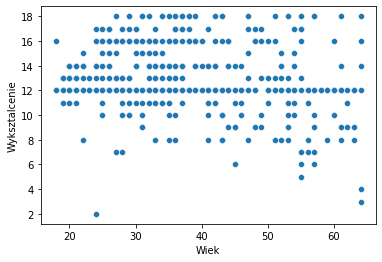

In [29]:
import seaborn as sns

sns.scatterplot(data=df, x='Wiek', y='Wyksztalcenie')

<AxesSubplot:xlabel='Wiek', ylabel='Wyksztalcenie'>

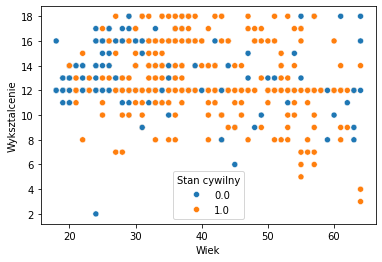

In [30]:
import seaborn as sns

sns.scatterplot(data=df, x='Wiek', y='Wyksztalcenie', hue='Stan cywilny')

                            OLS Regression Results                            
Dep. Variable:          Doswiadczenie   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.093e+05
Date:                Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:27:33   Log-Likelihood:                 181.09
No. Observations:                 534   AIC:                            -354.2
Df Residuals:                     530   BIC:                            -337.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.9913      0.049   -122.346

<AxesSubplot:xlabel='Wiek', ylabel='Doswiadczenie'>

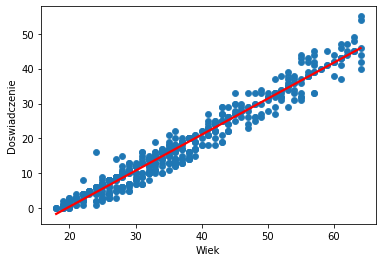

In [34]:
import statsmodels.api as sm

# Define the independent variables (X) and the dependent variable (Y)
X = df[['Wiek', 'Wyksztalcenie', 'Placa']]
Y = df['Doswiadczenie']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())


# Scatterplot
sns.scatterplot(data=df, x='Wiek', y='Doswiadczenie')

# Regression line
sns.regplot(data=df, x='Wiek', y='Doswiadczenie', ci=None, line_kws={'color':'red'})


	1. Model jest idealnie dopasowany (R-squared = 1.000), co jest rzadkością i może sugerować przeuczenie modelu.
	2.	Wiek i Wyksztalcenie mają istotny wpływ na Doswiadczenie, podczas gdy Placa nie jest istotna statystycznie.
	3.	Współczynnik Wyksztalcenie jest negatywny, co jest nietypowe i może sugerować kolinearność lub inne problemy z danymi.